# Heart Diesease: Visualization and Prediction

### Dataset

https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    
<b> Context </b> </br>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Contents

1. Load the Data
2. Data Visualization
3. Feature Engineering
4. Prediction
    1. SVM
    2. Random Forest
    3. K-nearest Neighbor
    4. Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
data.shape

(303, 14)

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Visualization

1    207
0     96
Name: sex, dtype: int64


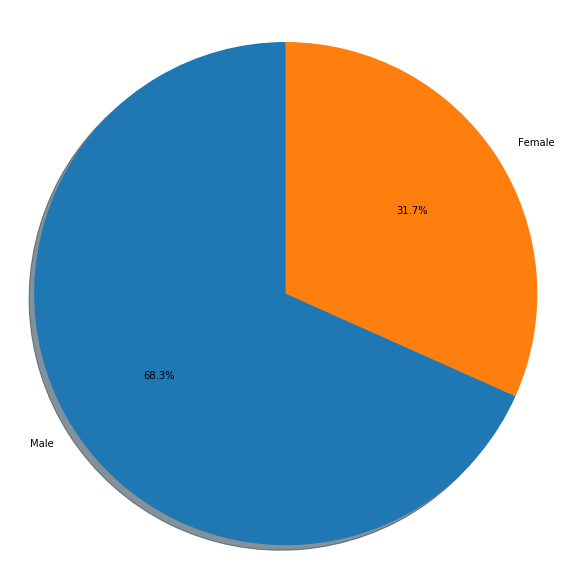

In [9]:
# male and female ratio
print(data.sex.value_counts())
labels = 'Male','Female'
colors = ['silver','firebrick']
sizes = [207,96]
explode = (0,0)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title(" ")
plt.show()

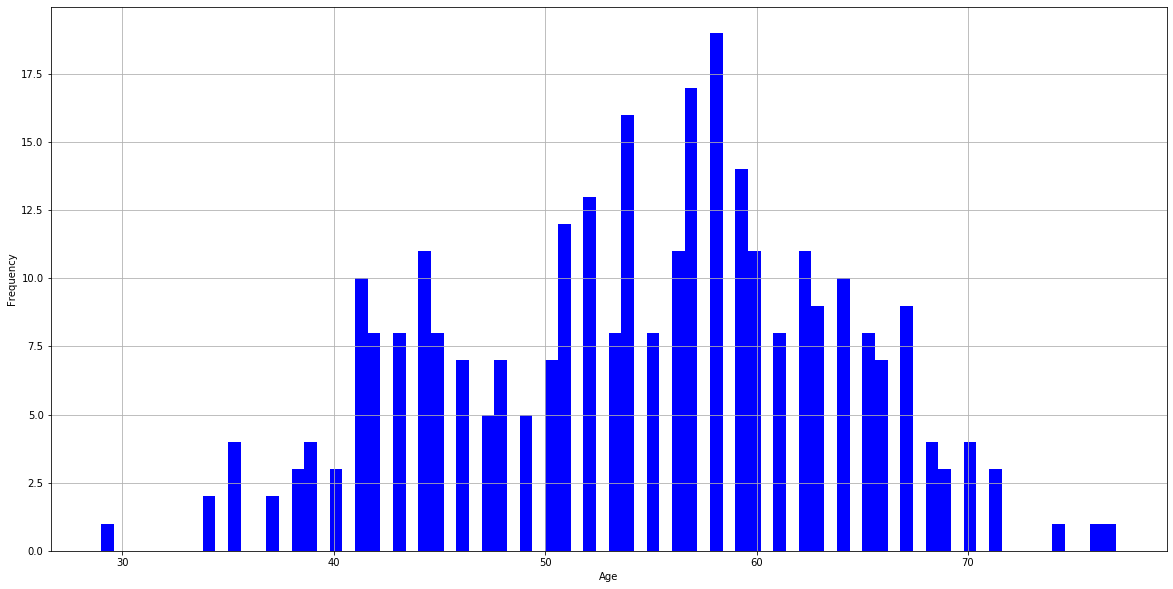

In [10]:
fig1, ax1 = plt.subplots(figsize=(20,10))
plt.hist(data.age, bins=80, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


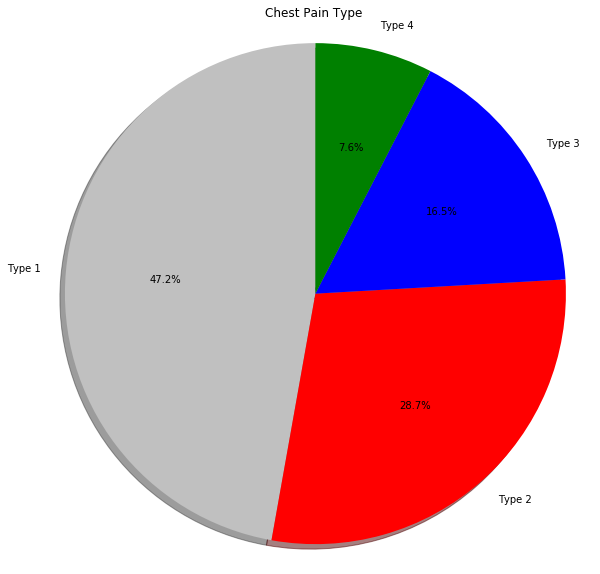

In [13]:
print(data.cp.value_counts())
labels = 'Type 1','Type 2','Type 3','Type 4'
explode = (0,0,0,0)
colors = ['silver','red','blue','green']
sizes = [143, 87,50,23]
fig,ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Chest Pain Type')
plt.show()

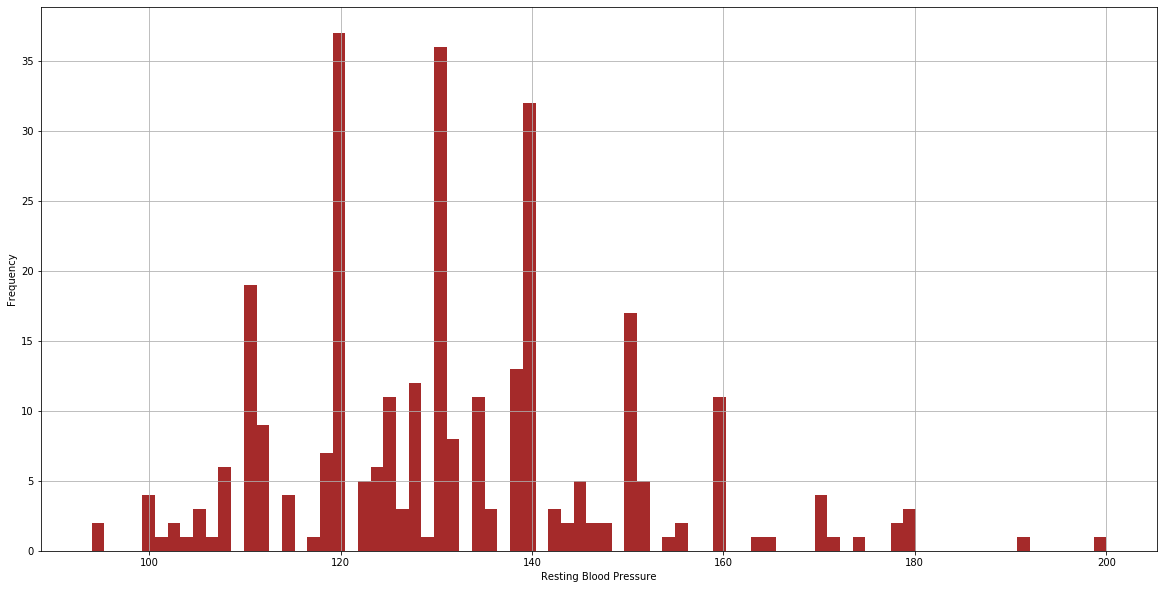

In [17]:
plt.figure(figsize=(20,10))
plt.hist(data.trestbps, bins=80, color='brown')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.grid()
plt.show()

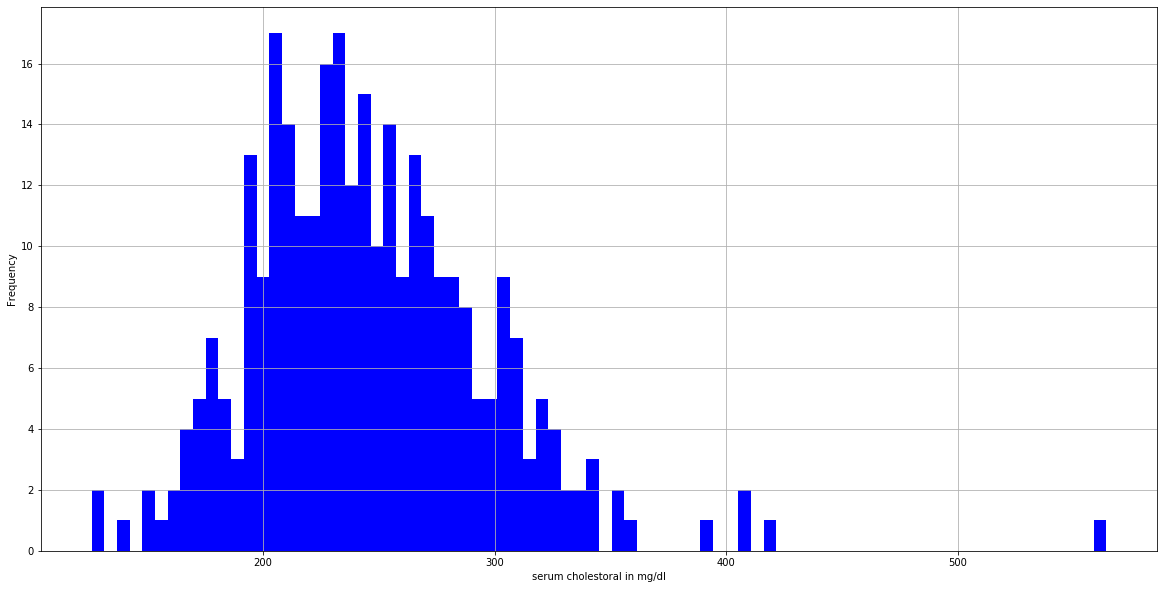

In [19]:
plt.figure(figsize=(20,10))
plt.hist(data.chol, bins=80, color='blue')
plt.xlabel("serum cholestoral in mg/dl")
plt.ylabel('Frequency')
plt.grid()
plt.show()